<a href="https://colab.research.google.com/github/muhammad-eka/gold-forecasting-XAUUSD/blob/main/Forex_XAUUSD_(GOLD_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Downloading Dataset to Local Colab
!echo Downloading Dataset
%cd /content
!gdown 1Z9Jsn2cRSwk832XTZbv3XW4OCBLV04_r
!echo Unpacking dataset
!unrar x 'XAUUSDH4.rar' -idq && rm 'XAUUSDH4.rar'
!echo dataset unpacked

/content
Downloading...
From: https://drive.google.com/uc?id=1Z9Jsn2cRSwk832XTZbv3XW4OCBLV04_r
To: /content/XAUUSDH4.rar
100% 154k/154k [00:00<00:00, 101MB/s]
Unpacking dataset
dataset unpacked


In [36]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('XAUUSDH4.csv', sep=',',encoding='utf-16') #load Dataset
df

,Time,Open,High,Low,Close,Volume,Flag
0,2010.01.07 00:00,1130.25,1135.00,1129.50,1131.40,10542,0
1,2010.01.08 00:00,1131.15,1139.45,1119.50,1137.75,73785,0
2,2010.01.11 00:00,1137.50,1161.80,1137.50,1151.50,68832,0
3,2010.01.12 00:00,1151.85,1158.05,1124.20,1127.80,67725,0
4,2010.01.13 00:00,1128.10,1138.65,1118.40,1137.75,75113,0
...,...,...,...,...,...,...,...
7550,2023.07.26 04:00,1964.86,1965.53,1961.96,1963.07,29218,0
7551,2023.07.26 08:00,1963.02,1972.44,1962.35,1972.18,42024,0
7552,2023.07.26 12:00,1972.19,1974.09,1969.53,1972.19,38526,0
7553,2023.07.26 16:00,1972.15,1974.99,1963.78,1970.26,83765,0


The dataset you can found on: https://drive.google.com/file/d/1Z9Jsn2cRSwk832XTZbv3XW4OCBLV04_r/view?usp=sharing

*Note*

If you want to use another pairs such as EURUSD, GBPUSD, etc.., please download self it from Metatrader data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7555 entries, 0 to 7554
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7555 non-null   object 
 1   Open    7555 non-null   float64
 2   High    7555 non-null   float64
 3   Low     7555 non-null   float64
 4   Close   7555 non-null   float64
 5   Volume  7555 non-null   int64  
 6   Flag    7555 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 413.3+ KB


In [6]:
df.isna().sum()

Time      0
Open      0
High      0
Low       0
Close     0
Volume    0
Flag      0
dtype: int64

normally we dont have a null data in each of variabels.

In [9]:
df.describe()

,Open,High,Low,Close,Volume,Flag
count,7555.00000,7555.000000,7555.000000,7555.000000,7555.000000,7555.0
mean,1681.16104,1687.472484,1674.650267,1681.191222,45332.561218,0.0
std,253.05407,251.797456,254.178102,253.084870,52517.896828,0.0
min,1052.07000,1063.440000,1046.230000,1051.230000,2.000000,0.0
25%,1529.27500,1543.660000,1519.000000,1529.080000,15356.000000,0.0
50%,1773.98000,1778.890000,1768.690000,1774.140000,28354.000000,0.0
75%,1860.78500,1865.610000,1854.060000,1860.835000,55533.000000,0.0
max,2067.17000,2078.770000,2063.370000,2067.300000,631238.000000,0.0


The Flag column doesn't represent any values, we can drop this column

In [11]:
data= df.drop('Flag',axis=1)
data

,Time,Open,High,Low,Close,Volume
0,2010.01.07 00:00,1130.25,1135.00,1129.50,1131.40,10542
1,2010.01.08 00:00,1131.15,1139.45,1119.50,1137.75,73785
2,2010.01.11 00:00,1137.50,1161.80,1137.50,1151.50,68832
3,2010.01.12 00:00,1151.85,1158.05,1124.20,1127.80,67725
4,2010.01.13 00:00,1128.10,1138.65,1118.40,1137.75,75113
...,...,...,...,...,...,...
7550,2023.07.26 04:00,1964.86,1965.53,1961.96,1963.07,29218
7551,2023.07.26 08:00,1963.02,1972.44,1962.35,1972.18,42024
7552,2023.07.26 12:00,1972.19,1974.09,1969.53,1972.19,38526
7553,2023.07.26 16:00,1972.15,1974.99,1963.78,1970.26,83765


In [40]:
data['Time'] = pd.to_datetime(df['Time'])
data

,Time,Open,High,Low,Close,Volume
0,2010-01-07 00:00:00,1130.25,1135.00,1129.50,1131.40,10542
1,2010-01-08 00:00:00,1131.15,1139.45,1119.50,1137.75,73785
2,2010-01-11 00:00:00,1137.50,1161.80,1137.50,1151.50,68832
3,2010-01-12 00:00:00,1151.85,1158.05,1124.20,1127.80,67725
4,2010-01-13 00:00:00,1128.10,1138.65,1118.40,1137.75,75113
...,...,...,...,...,...,...
7550,2023-07-26 04:00:00,1964.86,1965.53,1961.96,1963.07,29218
7551,2023-07-26 08:00:00,1963.02,1972.44,1962.35,1972.18,42024
7552,2023-07-26 12:00:00,1972.19,1974.09,1969.53,1972.19,38526
7553,2023-07-26 16:00:00,1972.15,1974.99,1963.78,1970.26,83765


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7555 entries, 0 to 7554
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    7555 non-null   datetime64[ns]
 1   Open    7555 non-null   float64       
 2   High    7555 non-null   float64       
 3   Low     7555 non-null   float64       
 4   Close   7555 non-null   float64       
 5   Volume  7555 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 354.3 KB


<ipython-input-39-36262ed5232c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr().abs(),annot=True)


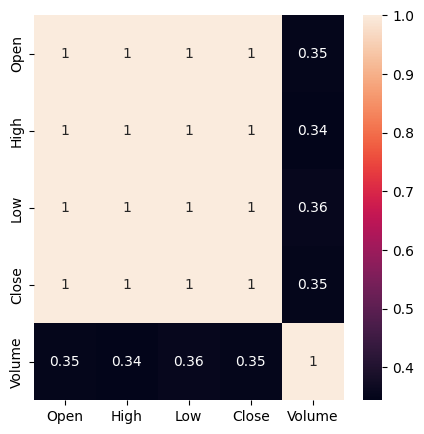

In [39]:

plt.figure(figsize=(5,5))
sns.heatmap(data.corr().abs(),annot=True)
plt.show()

In [80]:
import plotly.graph_objects as go
fig_open = go.Figure()
fig_open.add_trace(go.Scatter(x=data['Time'], y=data['Open'], mode='lines',name='Open'))
fig_open.add_trace(go.Scatter(x=data['Time'], y=data['Close'], mode='lines',name='Close'))

fig_open.show()


In [81]:
import plotly.graph_objects as go
fig_high = go.Figure()
fig_high.add_trace(go.Scatter(x=data['Time'], y=data['High'], mode='lines',name='Open'))
fig_high.add_trace(go.Scatter(x=data['Time'], y=data['Low'], mode='lines',name='Close'))

fig_high.show()
